In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

In [42]:
df=pd.read_csv("camera_dataset.csv")

In [43]:
df.head()

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,1997,1024,640,0,38,114,70,40,4,420,95.0,179
1,1998,1280,640,1,38,114,50,0,4,420,158.0,179
2,2000,640,0,0,45,45,0,0,2,0,0.0,179
3,1999,1152,640,0,35,35,0,0,4,0,0.0,269
4,1999,1152,640,0,43,43,50,0,40,300,128.0,1299


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Release date             1038 non-null   int64  
 1   Max resolution           1038 non-null   int64  
 2   Low resolution           1038 non-null   int64  
 3   Effective pixels         1038 non-null   int64  
 4   Zoom wide (W)            1038 non-null   int64  
 5   Zoom tele (T)            1038 non-null   int64  
 6   Normal focus range       1038 non-null   int64  
 7   Macro focus range        1038 non-null   int64  
 8   Storage included         1038 non-null   int64  
 9   Weight (inc. batteries)  1038 non-null   int64  
 10  Dimensions               1038 non-null   float64
 11  Price                    1038 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 97.4 KB


In [46]:
df.describe()

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000
mean,2003.590559,2474.672447,1773.936416,4.596339,32.963391,121.525048,44.145472,7.790944,17.472062,319.064547,105.350193,457.384393
std,2.724755,759.513608,830.897955,2.844044,10.333149,93.455422,24.141959,8.096789,27.419712,260.199205,24.241312,760.452918
min,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,2002.000000,2048.000000,1120.000000,3.000000,35.000000,96.000000,30.000000,3.000000,8.000000,180.000000,92.000000,149.000000
50%,2004.000000,2560.000000,2048.000000,4.000000,36.000000,108.000000,50.000000,6.000000,16.000000,225.500000,101.000000,199.000000
75%,2006.000000,3072.000000,2560.000000,7.000000,38.000000,117.000000,60.000000,10.000000,20.000000,347.500000,115.000000,399.000000
max,2007.000000,5616.000000,4992.000000,21.000000,52.000000,518.000000,120.000000,85.000000,450.000000,1860.000000,240.000000,7999.000000


In [47]:
df.shape

(1038, 12)

In [48]:
X = df.drop('Price',axis = 1)
Y = df['Price']

In [49]:
df.isna().sum()

Release date               0
Max resolution             0
Low resolution             0
Effective pixels           0
Zoom wide (W)              0
Zoom tele (T)              0
Normal focus range         0
Macro focus range          0
Storage included           0
Weight (inc. batteries)    0
Dimensions                 0
Price                      0
dtype: int64

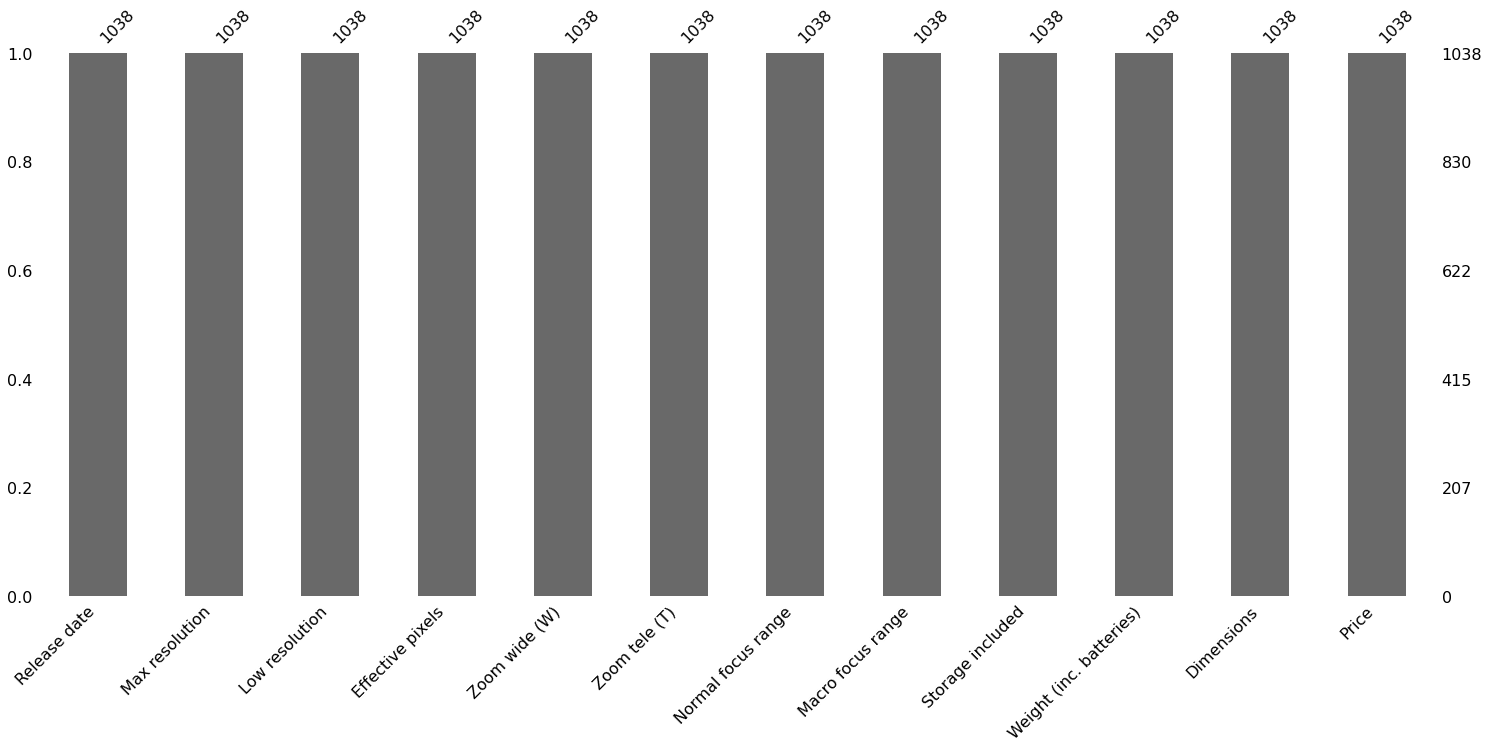

In [50]:
import missingno as msno

msno.bar(df)
plt.show()

In [52]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.5,random_state=0)

In [53]:
a = StandardScaler()
X_train = a.fit_transform(X_train)
X_test = a.fit_transform(X_test)

In [54]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [55]:
Y_pred = clf.predict(X_test)

In [56]:
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 4, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [57]:
accuracy_score(Y_test, Y_pred)

0.21579961464354527

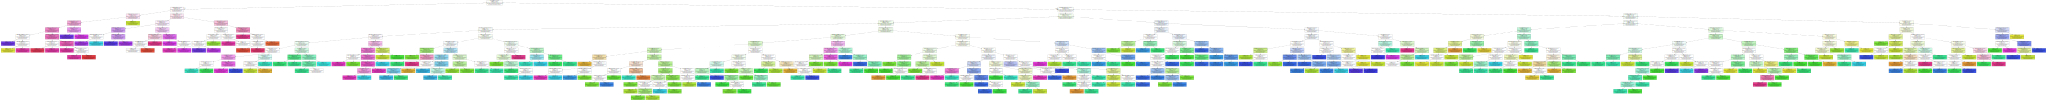

In [59]:
graphviz.Source(export_graphviz(clf,feature_names=X.columns,filled=True))